In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('lc_loan.csv')

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.options.display.max_columns= 80
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop(columns=['pymnt_plan','url','desc','zip_code','title'],inplace=True)

In [5]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open

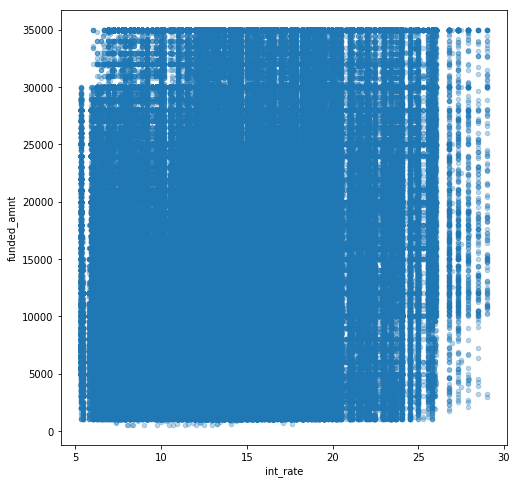

In [6]:
fig = plt.figure(figsize =(8,8))
ax = fig.gca()
data.plot(x='int_rate', y = 'funded_amnt',kind = 'scatter', ax=ax, alpha = 0.3)

In [7]:
ins = data.groupby('open_acc')['delinq_2yrs'].mean()
ins

open_acc
0.0     0.142857
1.0     0.112069
2.0     0.158141
3.0     0.163219
4.0     0.193649
5.0     0.215335
6.0     0.239876
7.0     0.268278
8.0     0.290606
9.0     0.303855
10.0    0.322072
11.0    0.333619
12.0    0.341119
13.0    0.353783
14.0    0.350713
15.0    0.354769
16.0    0.357971
17.0    0.364133
18.0    0.359385
19.0    0.370855
20.0    0.374853
21.0    0.365086
22.0    0.383623
23.0    0.387009
24.0    0.374298
25.0    0.367234
26.0    0.396238
27.0    0.400000
28.0    0.388313
29.0    0.380000
          ...   
47.0    0.266667
48.0    0.750000
49.0    0.304348
50.0    0.500000
51.0    0.588235
52.0    0.307692
53.0    0.125000
54.0    0.400000
55.0    0.125000
56.0    0.000000
57.0    0.000000
58.0    0.200000
59.0    0.000000
60.0    0.500000
61.0    0.500000
62.0    1.000000
63.0    1.000000
64.0    0.000000
65.0    0.000000
66.0    2.000000
67.0    0.000000
68.0    2.000000
70.0    0.000000
74.0    0.000000
75.0    0.000000
76.0    0.000000
79.0    0.000000
82.0 

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'density')

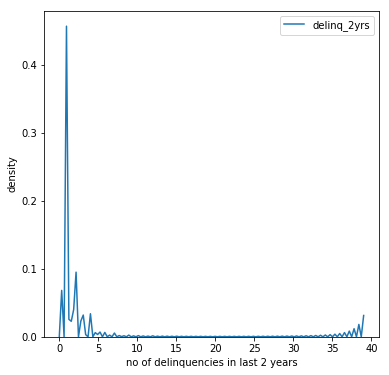

In [8]:
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
sns.kdeplot(data['delinq_2yrs'], ax=ax)
ax.set_xlabel('no of delinquencies in last 2 years')
ax.set_ylabel('density')

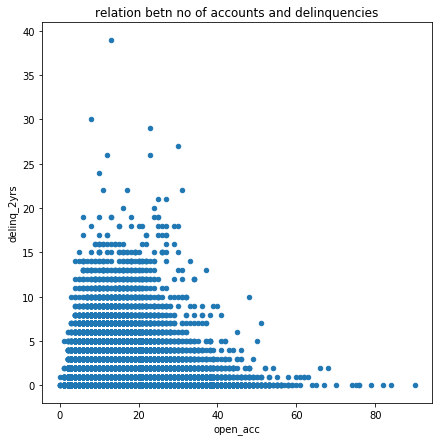

In [9]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
data.plot(x='open_acc', y='delinq_2yrs', kind = 'scatter',title='relation betn no of accounts and delinquencies', ax=ax)

In [10]:
data['term']= data['term'].str.strip(' months').astype('float')

In [11]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60.0,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,other,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [13]:
data['sub_grade'] = data['sub_grade'].replace({"A1":35, "A2":34, "A3":33, "A4":32, "A5":31, "B1":30, "B2":29, "B3":28, "B4":27, "B5":26, "C1":25, "C2":24, "C3":23, "C4":22, "C5":21, "D1":20, "D2":19, "D3":18, "D4":17, "D5":16, "E1":15, "E2":14, "E3":13, "E4":12, "E5":11, "F1":10, "F2":9, "F3":8, "F4":7, "F5":6, "G1":5, "G2":4, "G3":3, "G4":2, "G5":1})

In [14]:
data['sub_grade'].corr(data['delinq_2yrs'])

-0.061243643425117684

In [15]:
# Seperating good Quaility loan from Bad quality loans. 1= good quality, 0= bad quality
data['loan_status'] = data['loan_status'].replace({"Fully Paid":1 ,"Current":1,"Charged Off":0, "Issued":1, "In Grace Period":0, "Late (16-30 days)":0, "Late (31-120 days)":0, "Default":0, "Does not meet the credit policy. Status:Fully Paid":0, "Does not meet the credit policy. Status:Charged Off":0}) 

In [16]:
data['loan_status'].corr(data['delinq_2yrs'])

-0.0021347053067418673

In [17]:
data['loan_status'].value_counts()

1    817962
0     69417
Name: loan_status, dtype: int64

In [18]:
good = data.loc[data['loan_status']==1]
bad = data.loc[data['loan_status']==0]

In [19]:
df = data.groupby('grade')['int_rate'].mean()
df

grade
A     7.243312
B    10.829618
C    13.980098
D    17.175814
E    19.897322
F    23.582787
G    25.626706
Name: int_rate, dtype: float64

Text(0.5,1,'Bad loans')

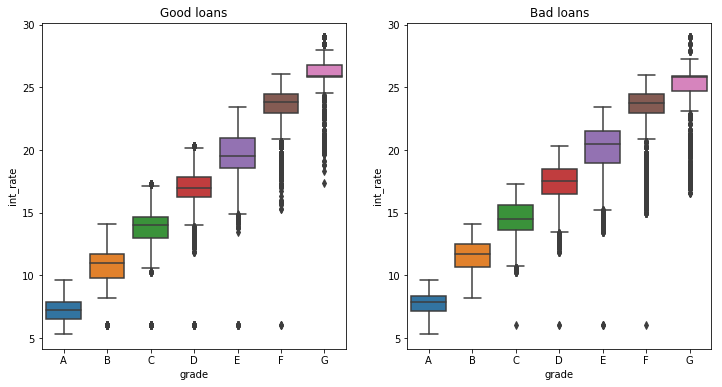

In [20]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.set_style('whitegrid')
sns.boxplot(data = good, x='grade',y='int_rate', order = ['A','B','C','D','E','F','G'], ax=ax[0])
ax[0].set_title('Good loans')
sns.boxplot(data = bad, x='grade',y='int_rate', order = ['A','B','C','D','E','F','G'], ax=ax[1])
ax[1].set_title('Bad loans')

Text(0.5,1,'bad loans')

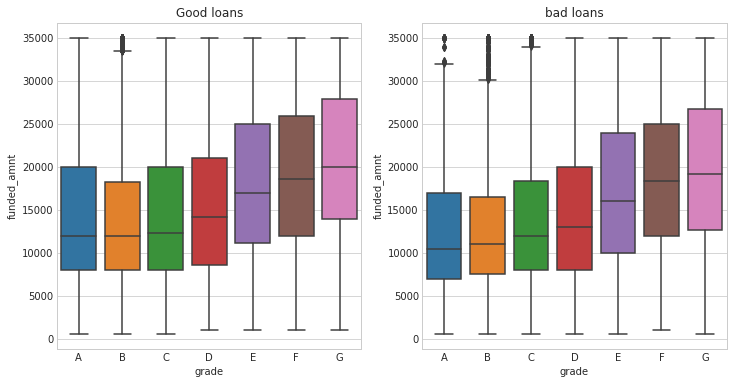

In [21]:
fig, ax = plt.subplots(1,2, figsize = (12,6))


sns.boxplot(data = good, x='grade',y='funded_amnt', order = ['A','B','C','D','E','F','G'], ax=ax[0])
ax[0].set_title('Good loans')
sns.boxplot(data = bad, x='grade',y='funded_amnt', order = ['A','B','C','D','E','F','G'], ax=ax[1])
ax[1].set_title('bad loans')

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


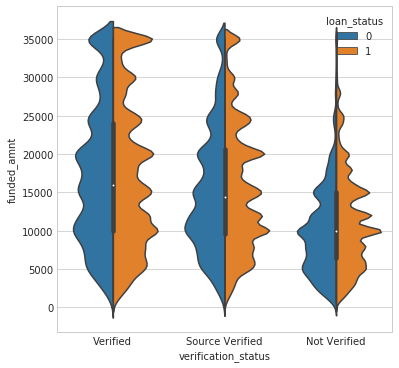

In [22]:
fig= plt.figure(figsize=(6,6))
ax = fig.gca()

sns.violinplot(data = data, x = 'verification_status', y = 'funded_amnt', hue = 'loan_status',ax=ax, split = True)

In [23]:
data['purpose'].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'bad loans')

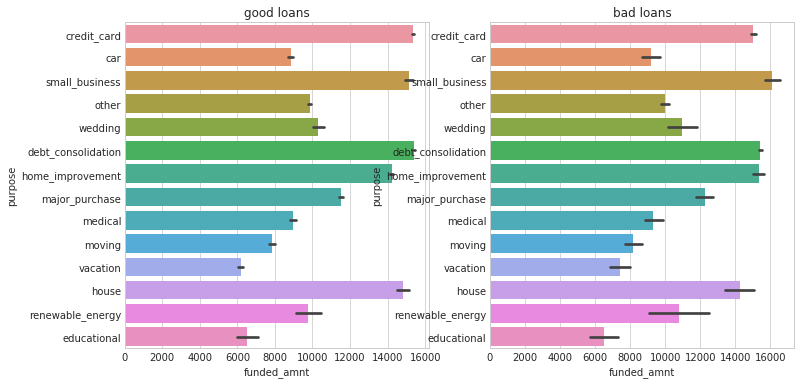

In [24]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

# good.plot(kind='bar', x = 'purpose', y ='funded_amnt', ax=ax[0], title = 'Good loans')
# bad.plot(kind='bar', x = 'purpose', y ='funded_amnt', ax=ax[1], title = 'Bad loans')
sns.barplot(data = good, y= 'purpose', x = 'funded_amnt', ax=ax[0], order = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'])
ax[0].set_title('good loans')
sns.barplot(data = bad, y= 'purpose', x = 'funded_amnt', ax=ax[1], order = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'])
ax[1].set_title('bad loans')

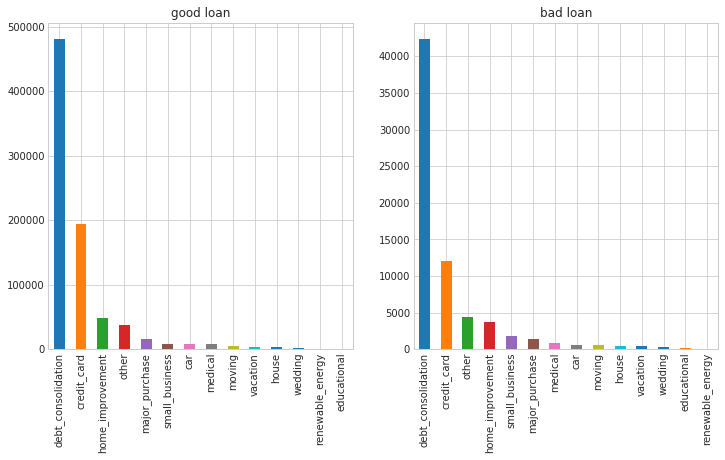

In [25]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

good['purpose'].value_counts().plot(kind='bar', ax=ax[0],title='good loan')
bad['purpose'].value_counts().plot(kind='bar', ax=ax[1],title='bad loan')

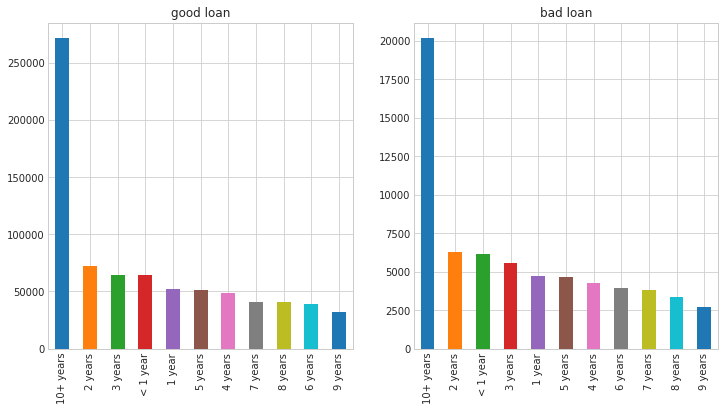

In [26]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

good['emp_length'].value_counts().plot(kind='bar', ax=ax[0],title='good loan')

bad['emp_length'].value_counts().plot(kind='bar', ax=ax[1],title='bad loan')

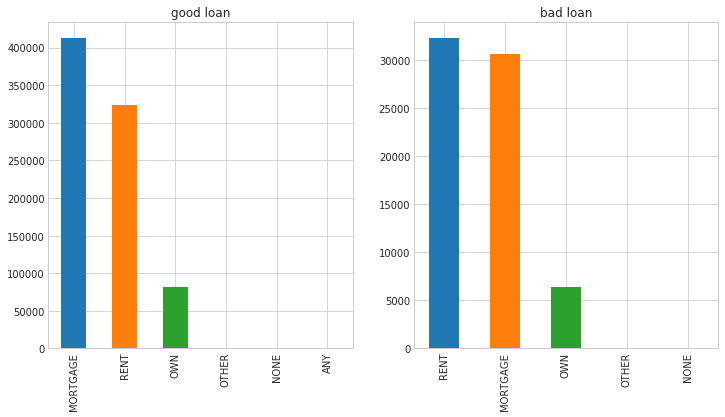

In [27]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

good['home_ownership'].value_counts().plot(kind='bar', ax=ax[0],title='good loan')

bad['home_ownership'].value_counts().plot(kind='bar', ax=ax[1],title='bad loan')

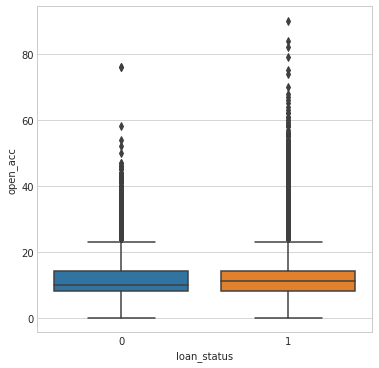

In [28]:
fig= plt.figure(figsize=(6,6))
ax = fig.gca()

sns.boxplot(data=data, x = 'loan_status', y='open_acc',ax=ax)

In [29]:
data.dropna(axis=0, subset= ['purpose', 'funded_amnt','verification_status', 'grade','int_rate','delinq_2yrs','open_acc','home_ownership','loan_status'],inplace= True)

In [30]:
final = data[['purpose', 'funded_amnt','verification_status', 'grade','int_rate','delinq_2yrs','open_acc','home_ownership']]

In [31]:
final.head()

,purpose,funded_amnt,verification_status,grade,int_rate,delinq_2yrs,open_acc,home_ownership
0,credit_card,5000.0,Verified,B,10.65,0.0,3.0,RENT
1,car,2500.0,Source Verified,C,15.27,0.0,3.0,RENT
2,small_business,2400.0,Not Verified,C,15.96,0.0,2.0,RENT
3,other,10000.0,Source Verified,C,13.49,0.0,10.0,RENT
4,other,3000.0,Source Verified,B,12.69,0.0,15.0,RENT


In [32]:
# final[['credit_card', 'car', 'small_business', 'other', 'wedding',
#        'debt_consolidation', 'home_improvement', 'major_purchase',
#        'medical', 'moving', 'vacation', 'house', 'renewable_energy',
#        'educational']] = pd.get_dummies(final['purpose'])

# final[['Verified', 'Source Verified', 'Not Verified']] = pd.get_dummies(final['verification_status'])

# final[['B', 'C', 'A', 'E', 'F', 'D', 'G']] = pd.get_dummies(final['grade'])

# final[['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY']] = pd.get_dummies(final['home_ownership'])

In [33]:
features = pd.get_dummies(final)

In [34]:
features.head()

,funded_amnt,int_rate,delinq_2yrs,open_acc,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,10.65,0.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2500.0,15.27,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,10000.0,13.49,0.0,10.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3000.0,12.69,0.0,15.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [35]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(features, data['loan_status'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
yfit = model.predict(features)

In [65]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
accuracy_score(data['loan_status'], yfit)

0.9861137093593283

In [39]:
cross_val_score(model, features, data['loan_status'], cv = 3).mean()

0.7346775767765353

In [40]:
# from sklearn import svm

# model1 = svm.SVC()
# model1.fit(features, data['loan_status'])

In [41]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()

model2.fit(features, data['loan_status'])

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
yfit2 = model2.predict(features)

In [43]:
accuracy_score(data['loan_status'], yfit2)

0.9807573110948329

In [44]:
cross_val_score(model2, features, data['loan_status'])

array([0.70449382, 0.85994124, 0.91312212])

In [45]:
from sklearn.naive_bayes import GaussianNB

model3 = GaussianNB()

model3.fit(features, data['loan_status'])

GaussianNB(priors=None)

In [46]:
yfit3 = model3.predict(features)

accuracy_score(data['loan_status'], yfit3)

0.8981337690877331

In [47]:
cross_val_score(model3, features, data['loan_status']).mean()

0.8965504123273097

In [48]:
test = pd.read_csv('lc_2016_2017.csv')
test.head()

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-2017,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-2002,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-2017,209.01,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-2017,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-2007,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-2017,652.91,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-2002,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-2017,431.73,Jan-2018,Dec-2017,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [49]:
test.dropna( axis = 0, subset=['purpose', 'funded_amnt','verification_status', 'grade','int_rate','delinq_2yrs','open_acc','home_ownership'], inplace= True)

In [50]:
test['loan_status'] = test['loan_status'].replace({"Fully Paid":1 ,"Current":1,"Charged Off":0, "Issued":1, "In Grace Period":0, "Late (16-30 days)":0, "Late (31-120 days)":0, "Default":0, "Does not meet the credit policy. Status:Fully Paid":0, "Does not meet the credit policy. Status:Charged Off":0})

In [51]:
features_test = test[['purpose', 'funded_amnt','verification_status', 'grade','int_rate','delinq_2yrs','open_acc','home_ownership']]

In [52]:
features_test.head()

,purpose,funded_amnt,verification_status,grade,int_rate,delinq_2yrs,open_acc,home_ownership
0,credit_card,2300,Not Verified,C,12.62,0,4,OWN
1,debt_consolidation,16000,Not Verified,C,12.62,0,9,MORTGAGE
2,home_improvement,6025,Not Verified,C,15.05,0,11,MORTGAGE
3,car,20400,Source Verified,B,9.44,0,15,RENT
4,debt_consolidation,13000,Source Verified,B,11.99,1,5,MORTGAGE


In [53]:
final_test = pd.get_dummies(features_test)

In [54]:
final_test.head()

,funded_amnt,int_rate,delinq_2yrs,open_acc,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT
0,2300,12.62,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,16000,12.62,0,9,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,6025,15.05,0,11,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,20400,9.44,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,13000,11.99,1,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [55]:
final_test.columns

Index(['funded_amnt', 'int_rate', 'delinq_2yrs', 'open_acc', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

In [56]:
features.columns

Index(['funded_amnt', 'int_rate', 'delinq_2yrs', 'open_acc', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT'],
      dtype='object')

In [57]:
final_test['home_ownership_OTHER'] = 0

In [58]:
final_test['purpose_educational']=0

In [59]:
yfit_test = model.predict(final_test)

In [60]:
yfit_test2 = model2.predict(final_test)

In [61]:
yfit_test3 = model3.predict(final_test)

In [62]:
cross_val_score(model, final_test, test['loan_status']).mean()

0.8347507226965026

In [63]:
accuracy_score(test['loan_status'], yfit_test)

0.7197730128085253

In [80]:
cm = pd.crosstab(data['loan_status'], yfit)

col_0,0,1
loan_status,,
0,63149,6239
1,6083,811879


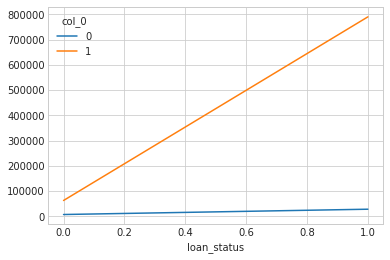